<a href="https://colab.research.google.com/github/jongwoo1126/Colab/blob/master/Ch03.%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/3_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2022/05/10
이름 : 박종우
내용 : 딥러닝 CNN 실습
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__


'2.8.0'

In [ ]:
# 데이터 불러오기
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

In [ ]:
# 데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[6]


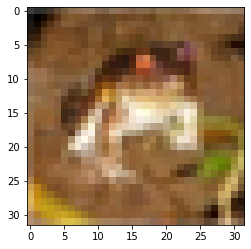

In [ ]:
# 이미지 확인
plt.imshow(cifar_train_data[0])
print(cifar_train_label[0])

[49295 10029 13359 34580 32212 13695  3453 49950 30754]


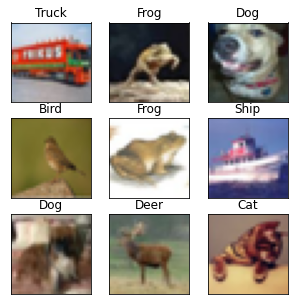

In [ ]:
# 데이터 샘플 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize = (5,5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [ ]:
# 모델 학습을 위한 데이터 전처리(정규화)
cifar_train_data2 = cifar_train_data / 255
cifar_test_data2 = cifar_test_data / 255

In [ ]:
# 데이터 라벨을 범주형(one-hot encoding)으로 변환
cifar_train_label2 = to_categorical(cifar_train_label)
cifar_test_label2 = to_categorical(cifar_test_label)
cifar_train_label2[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from pyparsing import actions
# 학습모델 구성
model = Sequential()

#CNN층
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

#FCNN층
model.add(Flatten())
model.add(Dense(256, activation='relu'))    #은닉층
model.add(Dense(10, activation='softmax'))  #출력층


In [ ]:
# 학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 학습하기
model.fit(cifar_train_data2, cifar_train_label2, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0463 - acc: 0.6293
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8019 - acc: 0.7172
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6638 - acc: 0.7690
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5554 - acc: 0.8042
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4700 - acc: 0.8343
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3946 - acc: 0.8597
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3347 - acc: 0.8824
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2776 - acc: 0.9021
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2419 - acc: 0.9134
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2151 - acc: 0.9249


In [ ]:
# 테스트
result = model.evaluate(cifar_test_data2, cifar_test_label2)
result

313/313 [==============================] - 1s 4ms/step - loss: 1.0946 - acc: 0.7642


[1.094616174697876, 0.76419997215271]

[3]


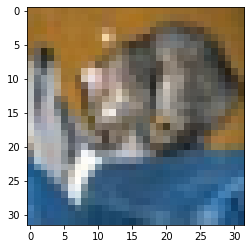

In [ ]:
# 이미지 확인
plt.imshow(cifar_test_data[0])
print(cifar_test_label[0])

In [ ]:
model.save('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/cifar_model.h5')